In [51]:
import darts
import datetime
from darts.datasets import AirPassengersDataset
import pandas as pd

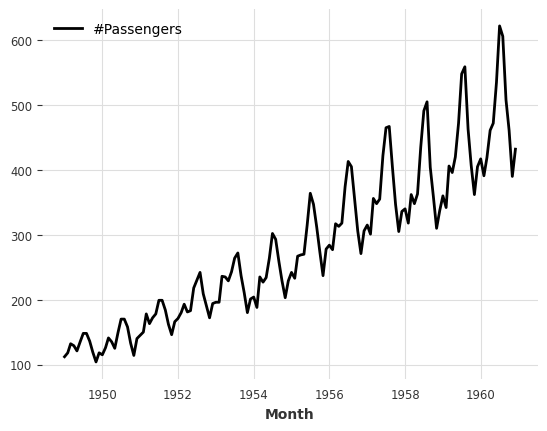

In [ ]:
series = AirPassengersDataset().load()
series.plot();

In [158]:
lr = LinearRegression()
X = series.to_dataframe().index.values.reshape(-1, 1)
y = series.to_dataframe()["#Passengers"].values.reshape(-1, 1).ravel()

firstX = X[0]
X_duration = X - firstX

# extract the number of months (not ns)
X_duration = X_duration.astype("timedelta64[M]").astype(int).ravel() + 1

X[:10], y[:10], X_duration[:10]

(array([['1949-01-01T00:00:00.000000000'],
        ['1949-02-01T00:00:00.000000000'],
        ['1949-03-01T00:00:00.000000000'],
        ['1949-04-01T00:00:00.000000000'],
        ['1949-05-01T00:00:00.000000000'],
        ['1949-06-01T00:00:00.000000000'],
        ['1949-07-01T00:00:00.000000000'],
        ['1949-08-01T00:00:00.000000000'],
        ['1949-09-01T00:00:00.000000000'],
        ['1949-10-01T00:00:00.000000000']], dtype='datetime64[ns]'),
 array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.]),
 array([1, 2, 2, 3, 4, 5, 6, 7, 8, 9]))

/Users/andy/dev/fourier-features/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


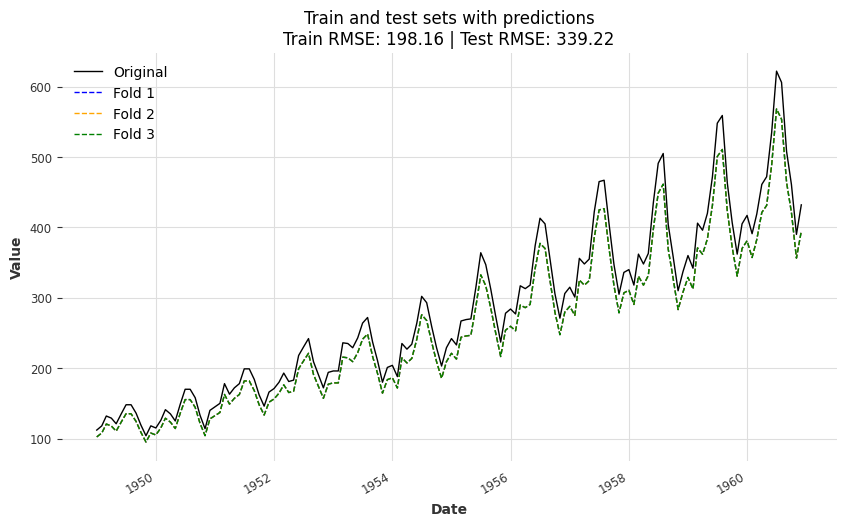

In [ ]:
%run src/fourier_features/_fit.py

X_transforms = [
    lambda x: np.log(x),
    lambda x: np.sin(x * 2 * np.pi / 1),
    lambda x: np.cos(x * 2 * np.pi / 1),
]

X0 = prep_X(X_duration, X_transforms)
y0 = prep_y(y)
# print(X0[:10], y0[:10])

ts = fit_ts_model(X0, y0)
plot_ts_model(ts, series, X_transforms=X_transforms)

/Users/andy/dev/fourier-features/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


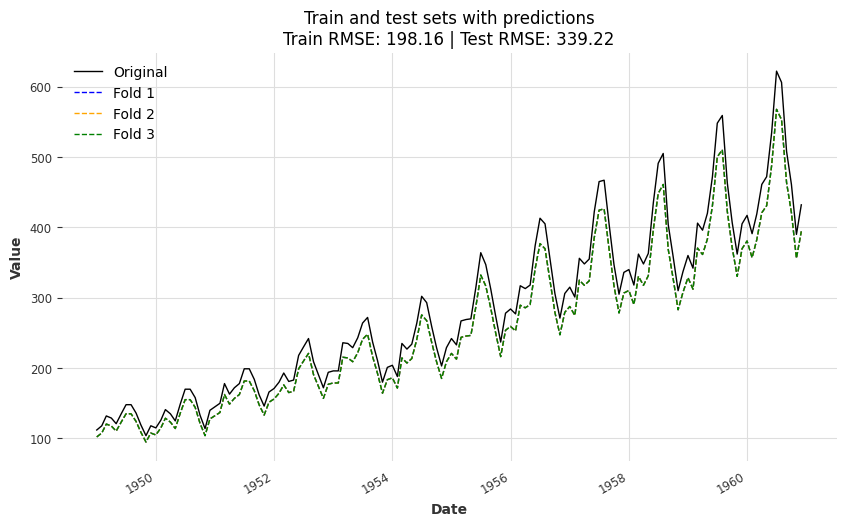

In [168]:
X_transforms = X_transforms + [
    lambda x: np.sin(x * 2 * np.pi / (2**1)),
    lambda x: np.cos(x * 2 * np.pi / (2**1)),
]

X0 = prep_X(X_duration, X_transforms)
y0 = prep_y(y)

ts = fit_ts_model(X0, y0)
plot_ts_model(ts, series, X_transforms=X_transforms)

In [163]:
series.shape

(144, 1, 1)

In [79]:
df_pred.head()

,#Passengers
Month,
1952-01-01,176.798862
1952-02-01,178.500915
1952-03-01,180.202968
1952-04-01,181.905020
1952-05-01,183.607073


In [6]:
series.to_dataframe()


component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
